In [168]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt

In [169]:
df = web.DataReader("AAPL", "yahoo", start="1/1/2012", end="5/1/2019")

In [170]:
df.insert(6, '42d', df['Close'].rolling(42).mean(), True)
df.insert(7, '252d', df['Close'].rolling(252).mean(), True)

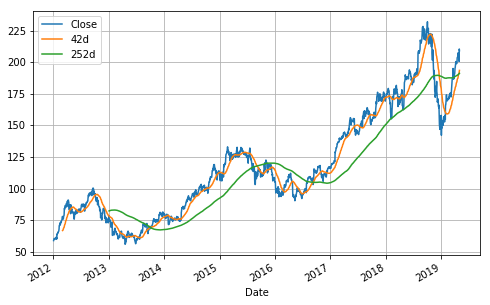

In [171]:
df[['Close', '42d', '252d']].plot(grid=True, figsize=(8,5))

In [163]:
SD = 5
df['42-252'] = df['42d'] - df['252d']
df['Regime'] = np.where(df['42-252'] > SD, 1, 0)
df['Regime'] = np.where(df['42-252'] < -SD, -1, df['Regime'])
df['Regime'].value_counts()

 1    989
-1    438
 0    417
Name: Regime, dtype: int64

(-1.1, 1.1)

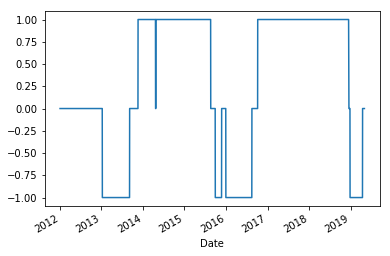

In [164]:
df['Regime'].plot(lw=1.5)
plt.ylim(-1.1, 1.1)

In [165]:
df['Market'] = np.log(df['Close'] / df['Close'].shift(1))
df['Strategy'] = df['Regime'].shift(1) * df['Market']

<Figure size 432x288 with 0 Axes>

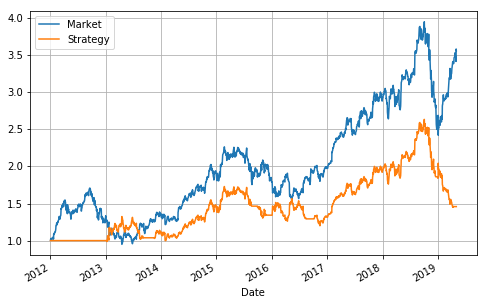

In [166]:
fig = plt.figure()
df[['Market', 'Strategy']].cumsum().apply(np.exp).plot(grid=True, figsize=(8, 5))

Input moving average and chart auto adjusts

Number of days moving average: 25


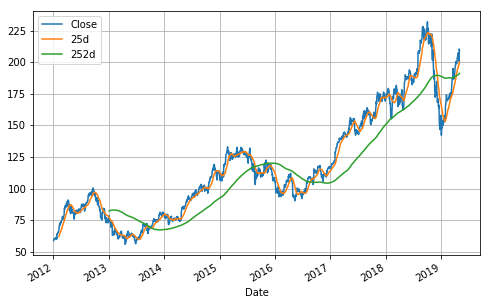

In [117]:
ma = int(input("Number of days moving average: "))
df.insert(6, '%sd' % ma, df['Close'].rolling(ma).mean(), True)
df[['Close', '%sd' % ma, '252d']].plot(grid=True, figsize=(8,5))